In [134]:
import numpy as np
import matplotlib.pyplot as plt
import Qchains
import plotly.graph_objects as go
from scipy.optimize import curve_fit
import cmath

### 5 atoms starting in eigenstate

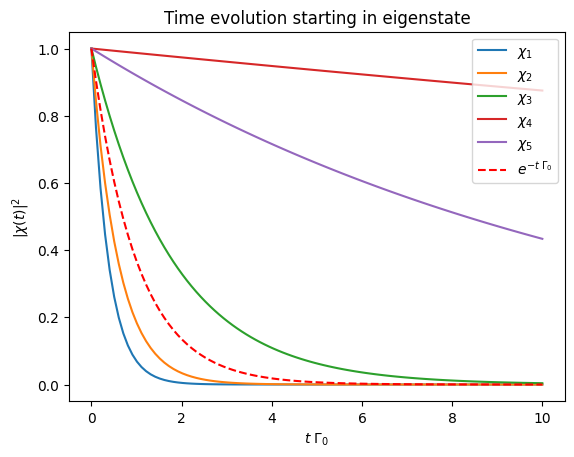

In [ ]:
points_5 = Qchains.ArrayGenerator(5, showStructure=False)
dipole_vector_hat = np.array([1, 0, 0]) #i x retning 
d_5 = 0.25
eig_vals_5, eig_vec_5 = Qchains.FindEigenstates(points_5, dipole_vector_hat, d_5)
time = np.linspace(0, 10, 100)

Qchains.PlotEigenstateEvolution(eig_vals_5, eig_vec_5, time, legend=True)

### 11 atoms starting in eigenstate

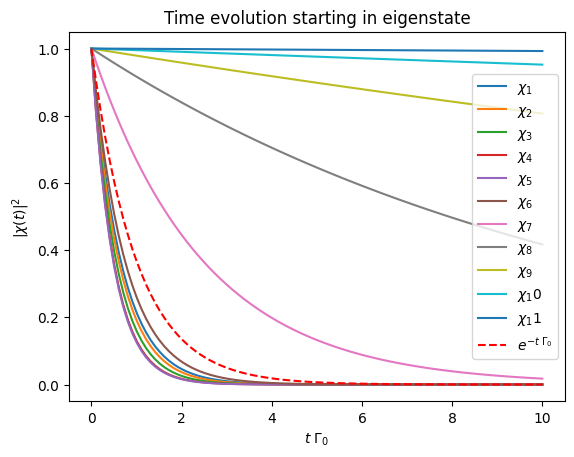

In [136]:
points_11 = Qchains.ArrayGenerator(11, showStructure=False)
dipole_vector_hat_11 = np.array([0, 1, 0]) #i y retning 
d_11 = 0.25
eig_val_11, eig_vec_11 = Qchains.FindEigenstates(points_11, dipole_vector_hat_11, d_11)
time = np.linspace(0, 10, 100)

Qchains.PlotEigenstateEvolution(eig_val_11, eig_vec_11, time, legend=True)

### 50 atoms starting in eigenstate

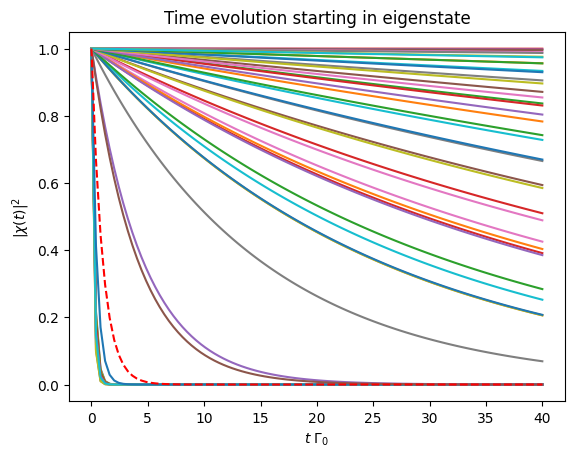

array([-1.8918 , -1.94197, -2.02514, -2.13976, -2.28457, -2.45358,
       -2.63961, -2.81009, -2.87038, -2.37728, -1.09528, -0.01974,
       -0.00223, -0.01174, -0.10921, -0.12111, -0.01069, -0.03338,
       -0.01976, -0.01721, -0.01967, -0.01135, -0.01573, -0.00842,
       -0.01193, -0.00652, -0.00895, -0.0051 , -0.00671, -0.00397,
       -0.00501, -0.00306, -0.00373, -0.00232, -0.00274, -0.00173,
       -0.00197, -0.00125, -0.00137, -0.00086, -0.00091, -0.00056,
       -0.00057, -0.00001, -0.00003, -0.00006, -0.00014, -0.00017,
       -0.00031, -0.00033])

In [137]:
points = Qchains.ArrayGenerator(50) #giver kæde på 25*2 - 1 = 49 
dipole_vector_hat = np.array([0, 1, 0]) #i y retning 
d = 0.1

eig_vals, eig_vec = Qchains.FindEigenstates(points, dipole_vector_hat, d)
time = np.linspace(0,40, 100)
Qchains.PlotEigenstateEvolution(eig_vals, eig_vec, time, legend=False)

np.set_printoptions(suppress=True, precision=5)
eig_vals.real

### From choosen initial state

Text(0, 0.5, '$|c_i|^2$')

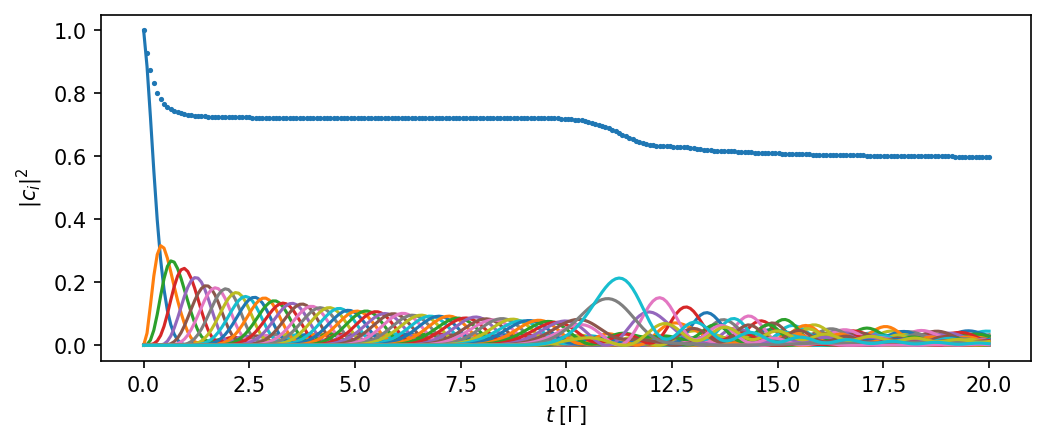

In [138]:
initial_state  = np.zeros(len(eig_vec))
initial_state[0] = 1
t = np.linspace(0, 20, 250)  # Shape (100,)
site_prob_t = Qchains.RandInitialStateEvolution(eig_vals, eig_vec, initial_state, t)

plt.figure(figsize=(8,3), dpi=150)
for i in range(len(eig_vec)): 
    plt.plot(t, site_prob_t[i,:], label = f"|c_{i+1}|^2")
plt.plot(t, np.sum(site_prob_t, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')
#plt.legend();

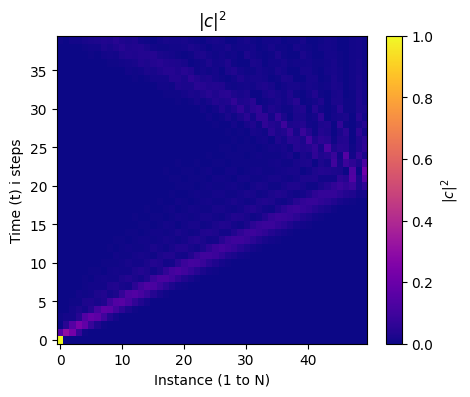

In [139]:
# Plot heatmap
t = np.linspace(0, 20, 40)  # Shape (100,)
site_prob_t = Qchains.RandInitialStateEvolution(eig_vals, eig_vec, initial_state, t)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower')

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')
plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels

plt.title('$|c|^2$')
plt.show()

### Varying d for N = 50

(0.0, 40.0)

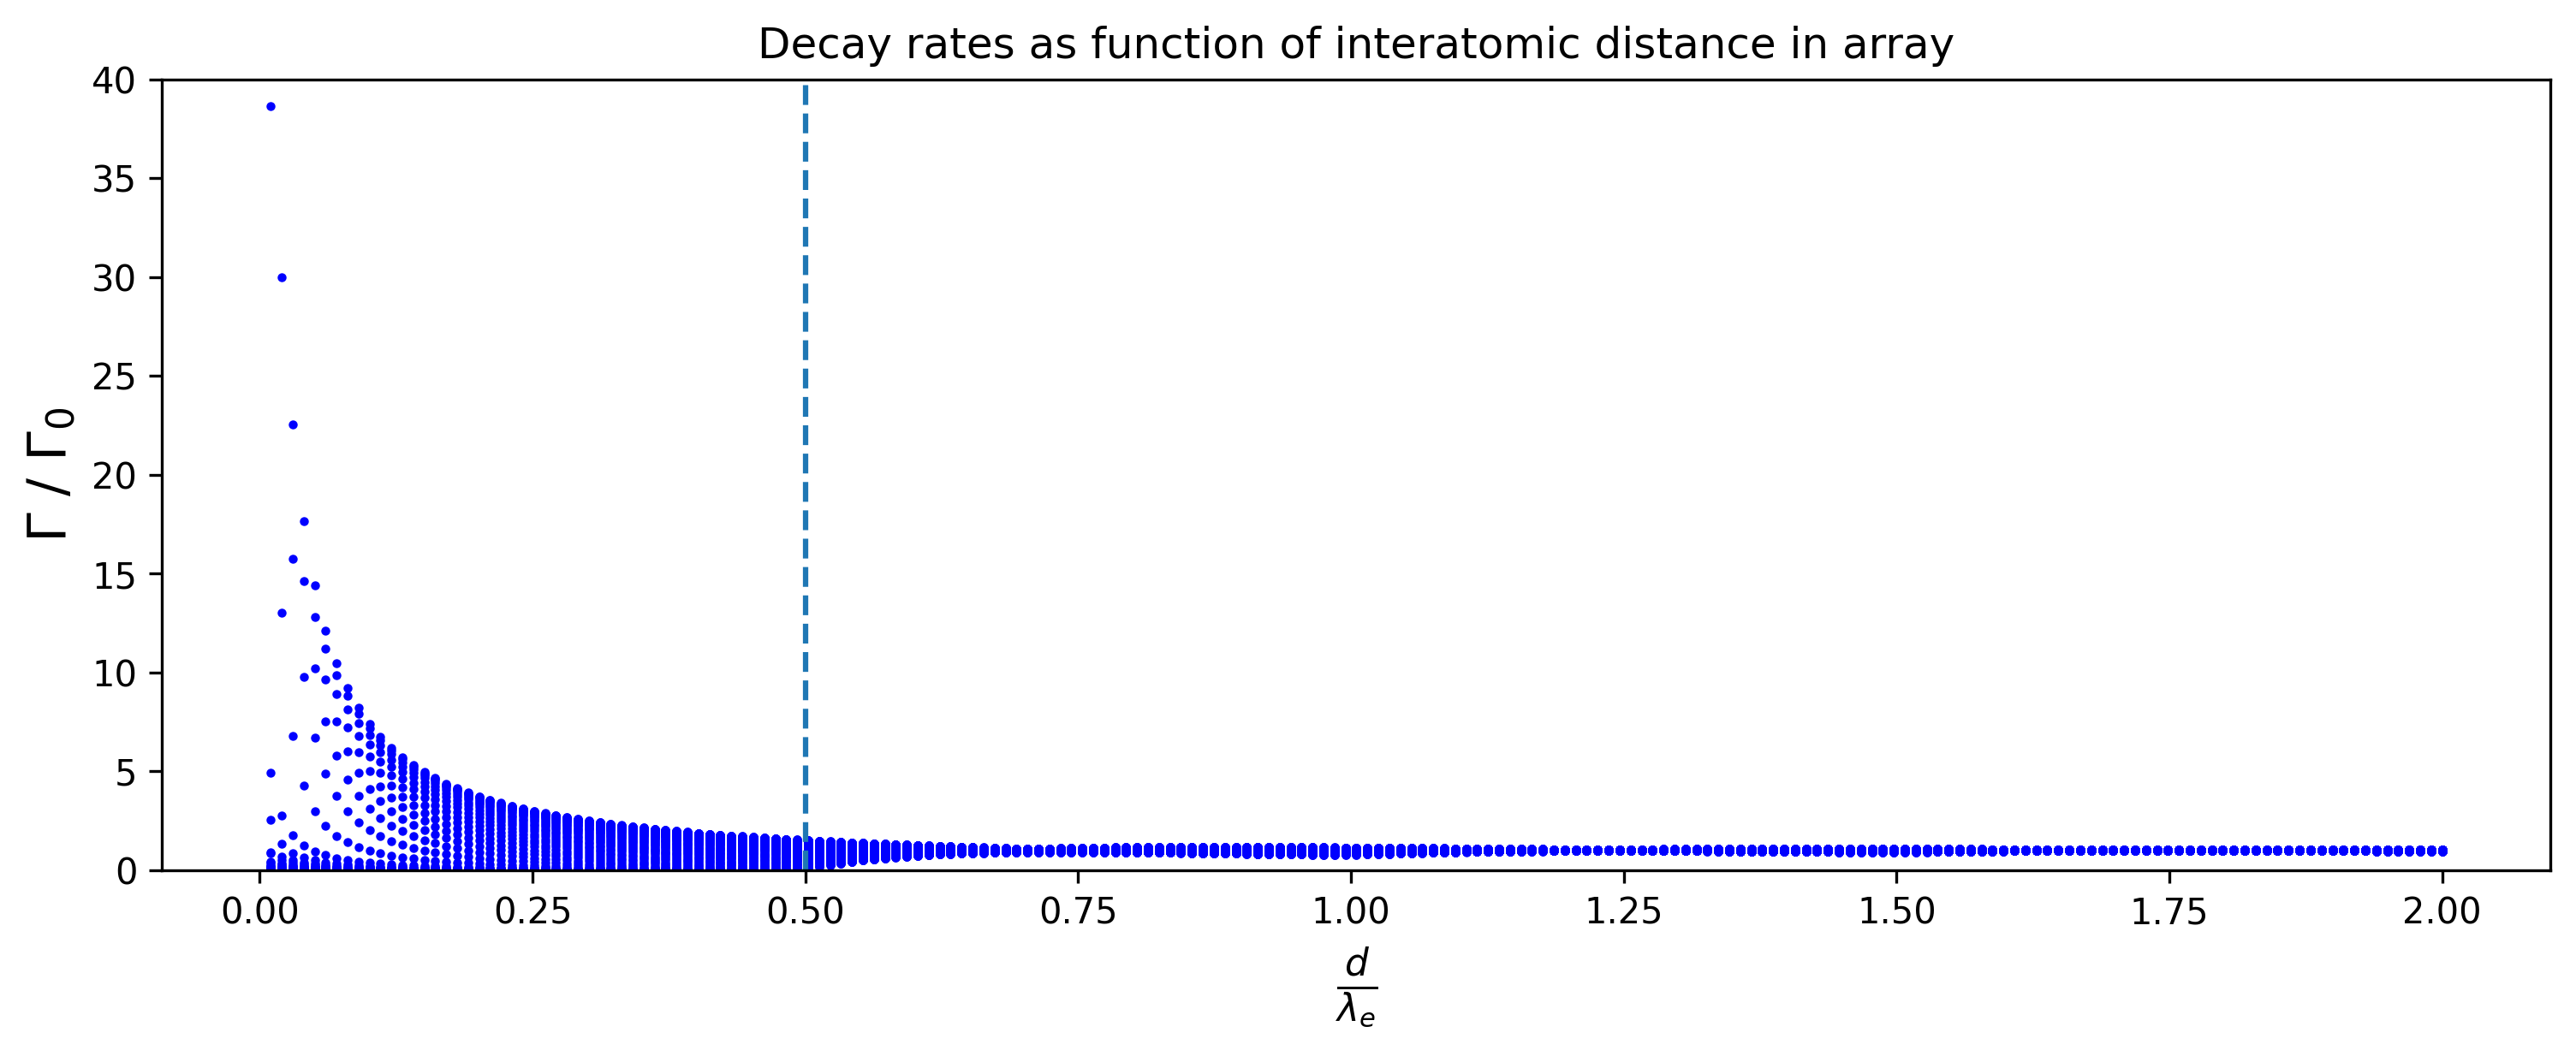

In [158]:
dipole_vector_hatx = np.array([1, 0, 0]) #i x retning
points_50 = Qchains.ArrayGenerator(50)
decay_rate_list = []
most_subradiant_list = []
most_superradiant_list = []
distances = np.linspace(0, 2, 200) #ik gang med pi, da det gøre i funktionen Qchains.FindEigenstates
for d in distances[1:]:
    eig_vals50, eig_vec_50 = Qchains.FindEigenstates(points_50, dipole_vector_hatx, d)
    decay_rate = 2 * eig_vals50.real
    decay_rate_list.append(decay_rate)

    subradiant = -np.max(2 * eig_vals50.real)
    most_subradiant_list.append(subradiant)
    superradiant = -np.min(2 * eig_vals50.real)
    most_superradiant_list.append(superradiant)

    

decay_rate_list_reversed = [-p for p in decay_rate_list]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of interatomic distance in array')

plt.ylim(-0, 40)

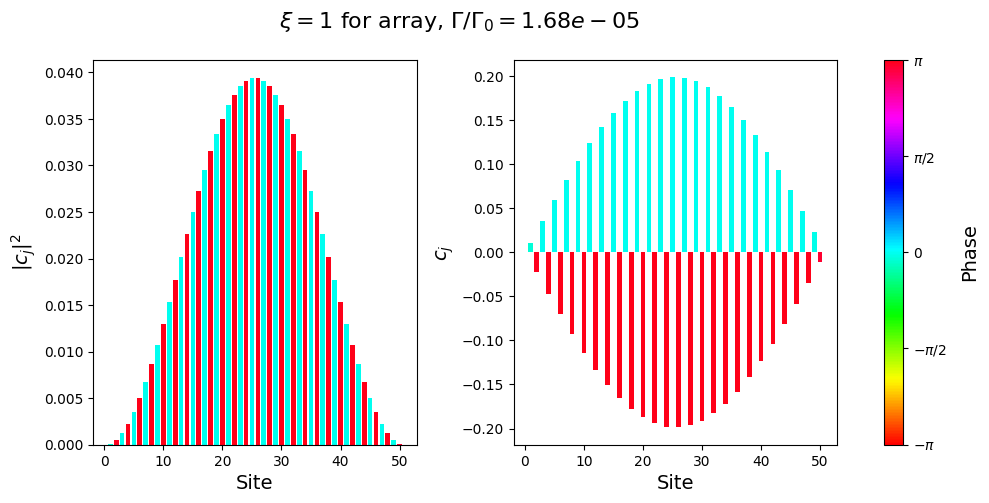

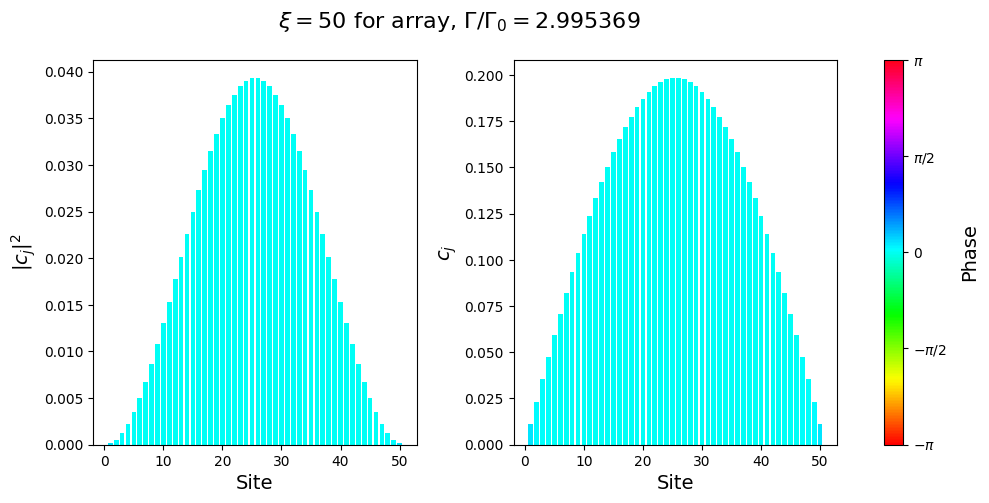

In [141]:
d_example = 0.25 
eig_vals50, eig_vec_50 = Qchains.FindEigenstates(points_50, dipole_vector_hatx, d_example)
Qchains.SiteProbAndAmplitudeDistribution(eig_vals50, eig_vec_50, state_num=0, titleprecision=7, sharey=False)
Qchains.SiteProbAndAmplitudeDistribution(eig_vals50, eig_vec_50, state_num=49, titleprecision=7, sharey=False)

Text(0, 0.5, '$\\Gamma_{\\xi=1}/\\Gamma_0$')

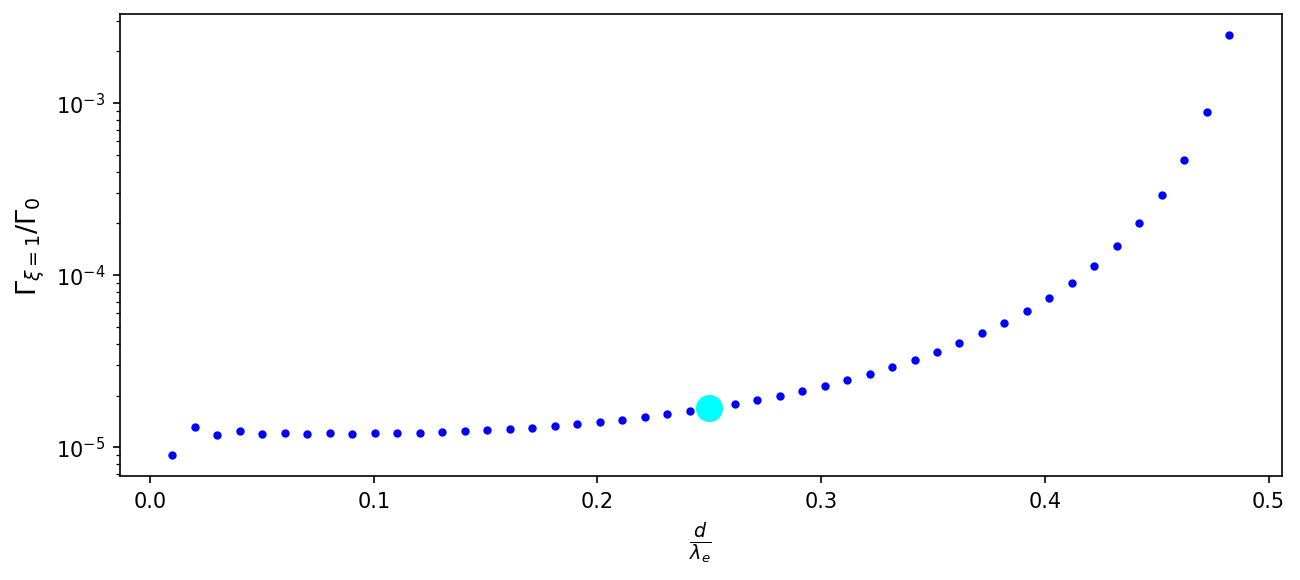

In [142]:
plt.figure(figsize=(10,4), dpi=150)
plt.yscale('log')
plt.plot(distances[1:49], most_subradiant_list[:48], '.', c = 'blue', markersize=6); 
plt.plot(0.25, - np.max(2 * eig_vals50.real), 'o', c = 'cyan', markersize = 12)
#plt.plot(distances[1:49], most_superradiant_list[:48], '.', c = 'cyan')
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 13)
plt.ylabel(r'$\Gamma_{\xi=1}/\Gamma_0$', size = 13)

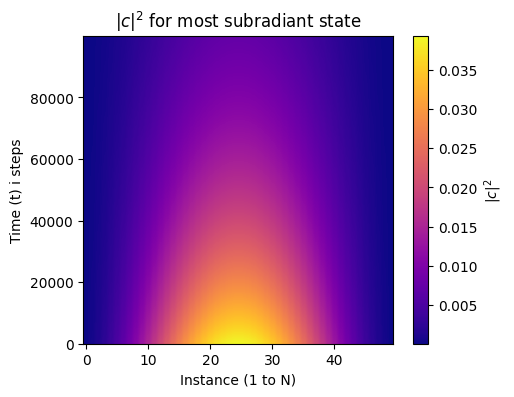

In [143]:
time = np.linspace(0, 100000, 100000)
most_subradiant_state = eig_vec_50[:, np.argmax(eig_vals50.real)]
Qchains.RandInitialStateEvolution(eig_vals50, eig_vec_50, most_subradiant_state, time)

site_prob_t = Qchains.RandInitialStateEvolution(eig_vals50, eig_vec_50, most_subradiant_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower')

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')
plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels

plt.title('$|c|^2$ for most subradiant state')
plt.show()

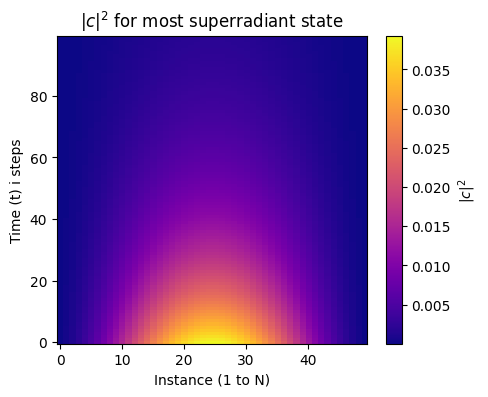

In [144]:
time = np.linspace(0, 1, 100)
most_subradiant_state = eig_vec_50[:, np.argmin(eig_vals50.real)]
Qchains.RandInitialStateEvolution(eig_vals50, eig_vec_50, most_subradiant_state, time)

site_prob_t = Qchains.RandInitialStateEvolution(eig_vals50, eig_vec_50, most_subradiant_state, time)
plt.figure(figsize=(5, 4))
plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower')

# Labels
plt.xlabel("Instance (1 to N)")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')
plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels

plt.title('$|c|^2$ for most superradiant state')
plt.show()

### Varying number of atoms, N for d = 0.25

In [145]:
np.linspace(10,200,39)

array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
        65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110., 115.,
       120., 125., 130., 135., 140., 145., 150., 155., 160., 165., 170.,
       175., 180., 185., 190., 195., 200.])

In [146]:
N_chain = np.linspace(10,200,39)
N_chain_int = N_chain.astype(int)
subradiant_decayrates_n = []

dipole_vector_hat = np.array([0, 1, 0]) #i y retning 
d = 0.25

for n in N_chain_int:
    points_n = Qchains.ArrayGenerator(n)
    eig_vals_n, eig_vec_n = Qchains.FindEigenstates(points_n, dipole_vector_hat, d)
    subradiant_decayrates_n.append(np.max(2*eig_vals_n.real))                                 #mest subradiante. Da alle er negative. Den tættest på 0, er subradiant og derfor np.max 

A =  4.581370271674389 k =  3.6305696850391245


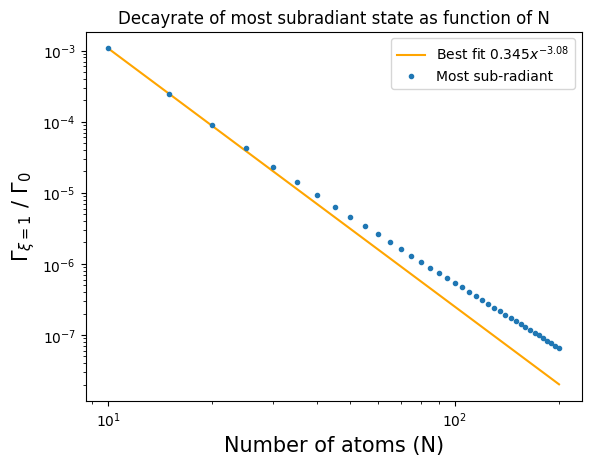

In [147]:
subradiant_decayrates_n_reversed = [-p for p in subradiant_decayrates_n]

def PowerFit(x, A, k):
    return A * x**(-k)
par, cov = curve_fit(PowerFit, N_chain_int, subradiant_decayrates_n_reversed, p0 = [4, 4])
print('A = ', par[0], 'k = ', par[1])

plt.plot(N_chain_int, PowerFit(N_chain_int, *par), '-' ,label = r'Best fit $0.345x^{-3.08}$', c='orange')

plt.plot(N_chain_int, subradiant_decayrates_n_reversed, '.', label = 'Most sub-radiant')


plt.xscale('log')
plt.yscale('log')
plt.title('Decayrate of most subradiant state as function of N')
plt.xlabel('Number of atoms (N)', size=15)
plt.ylabel(r'$\Gamma_{\xi=1} \ / \ \Gamma_0$', size = 15)
plt.legend();

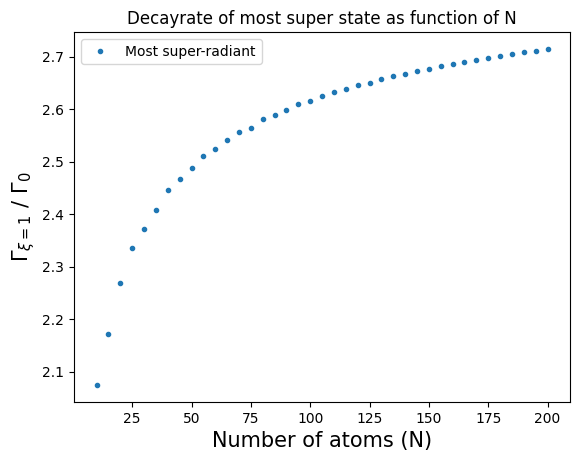

In [148]:
N_chain = np.linspace(10,200,39)
N_chain_int = N_chain.astype(int)
superradiant_decayrates_n = []

dipole_vector_hat = np.array([0, 1, 0]) #i y retning 
d = 0.25

for n in N_chain_int:
    points_n = Qchains.ArrayGenerator(n)
    eig_vals_n, eig_vec_n = Qchains.FindEigenstates(points_n, dipole_vector_hat, d)
    superradiant_decayrates_n.append(np.min(2*eig_vals_n.real))                                 #mest subradiante. Da alle er negative. Den tættest på 0, er subradiant og derfor np.max 

superradiant_decayrates_n_reversed = [-p for p in superradiant_decayrates_n]

# def PowerFit(x, A, k):
#     return A * x**(-k)
# par, cov = curve_fit(PowerFit, N_chain_int, subradiant_decayrates_n_reversed, p0 = [4, 4])
# print('A = ', par[0], 'k = ', par[1])

# plt.plot(N_chain_int, PowerFit(N_chain_int, *par), '-' ,label = r'Best fit $0.345x^{-3.08}$', c='orange')

plt.plot(N_chain_int, superradiant_decayrates_n_reversed, '.', label = 'Most super-radiant')


#plt.xscale('log')
#plt.yscale('log')
plt.title('Decayrate of most super state as function of N')
plt.xlabel('Number of atoms (N)', size=15)
plt.ylabel(r'$\Gamma_{\xi=1} \ / \ \Gamma_0$', size = 15)
plt.legend();

### Phase and amplitudes of most subradiant state

In [149]:
points_10 = Qchains.ArrayGenerator(10)
dipole_vector_hat_10 = np.array([0, 1, 0]) #i y retning 
d_10 = 0.25
eig_val_10, eig_vec_10 = Qchains.FindEigenstates(points_10, dipole_vector_hat_10, d_10)

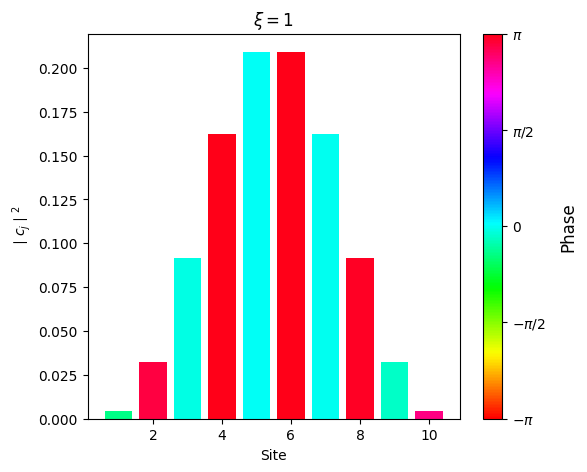

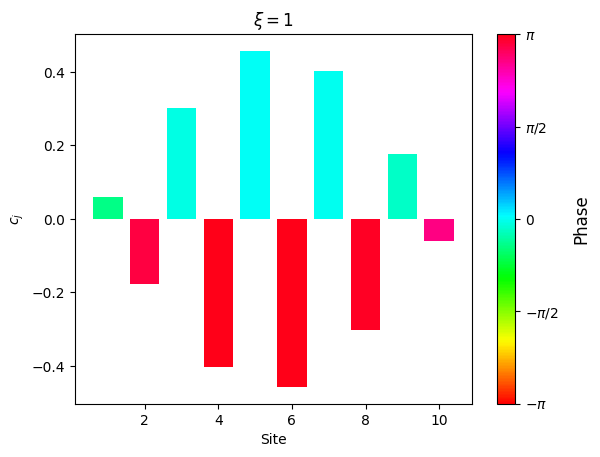

In [150]:
Qchains.SiteProbDistribution(eig_val_10, eig_vec_10, state_num = 0, figsize=(6,5), hue = True)
Qchains.SiteAmplitudeDistribution(eig_val_10, eig_vec_10, state_num = 0, hue = True)

### For amplitudes 

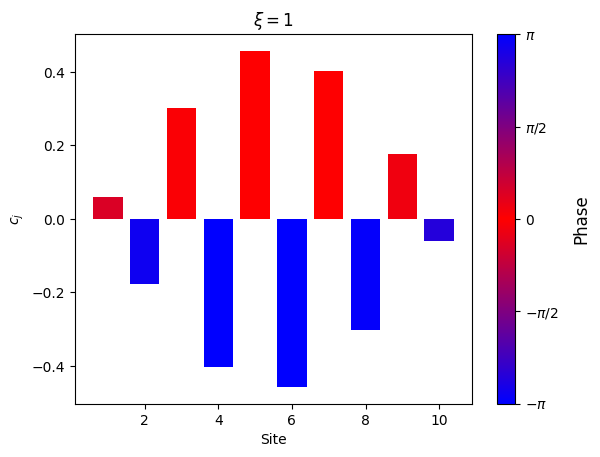

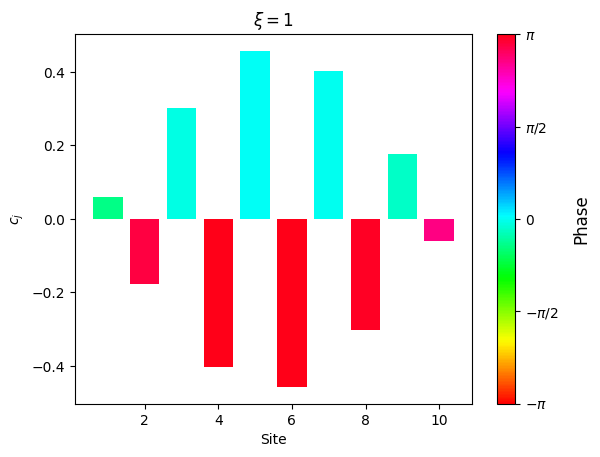

In [151]:
Qchains.SiteAmplitudeDistribution(eig_val_10, eig_vec_10, 0, hue=False)
Qchains.SiteAmplitudeDistribution(eig_val_10, eig_vec_10, 0, hue=True)

# Prøv for 50 kæden nu

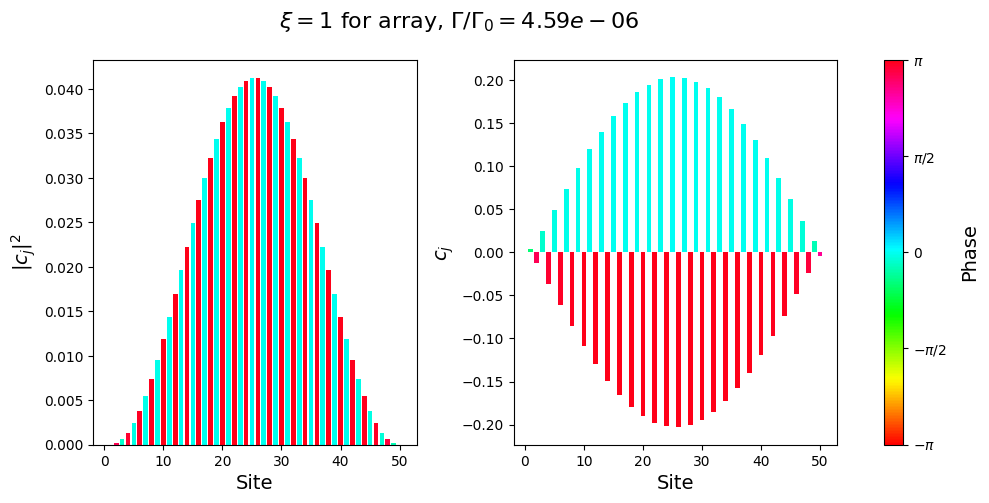

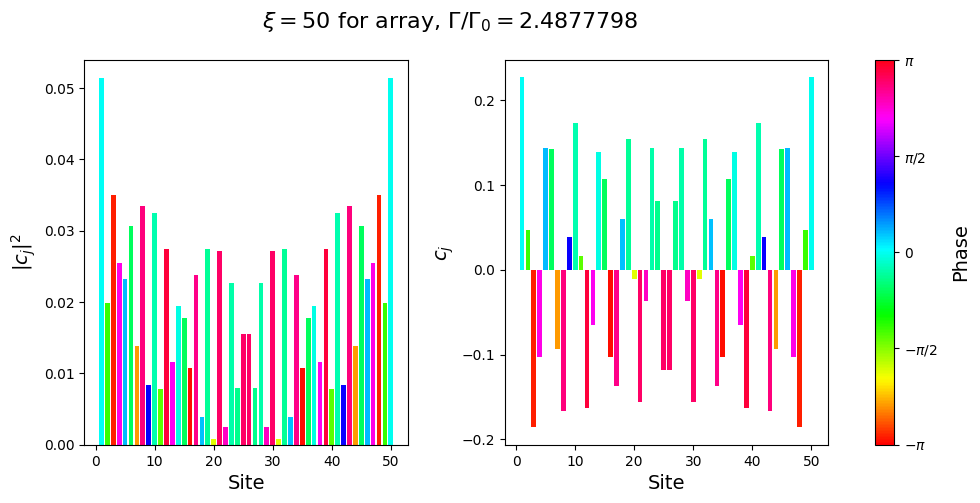

In [152]:
points_50 = Qchains.ArrayGenerator(50)
dipole_vector_hat_50 = np.array([0, 1, 0]) #i y retning 
d_50 = 0.25
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points_50, dipole_vector_hat_50, d_50)

Qchains.SiteProbAndAmplitudeDistribution(eig_val_50, eig_vec_50, state_num=0, titleprecision=8, sharey=False)
Qchains.SiteProbAndAmplitudeDistribution(eig_val_50, eig_vec_50, state_num=49, titleprecision=7, sharey=False)

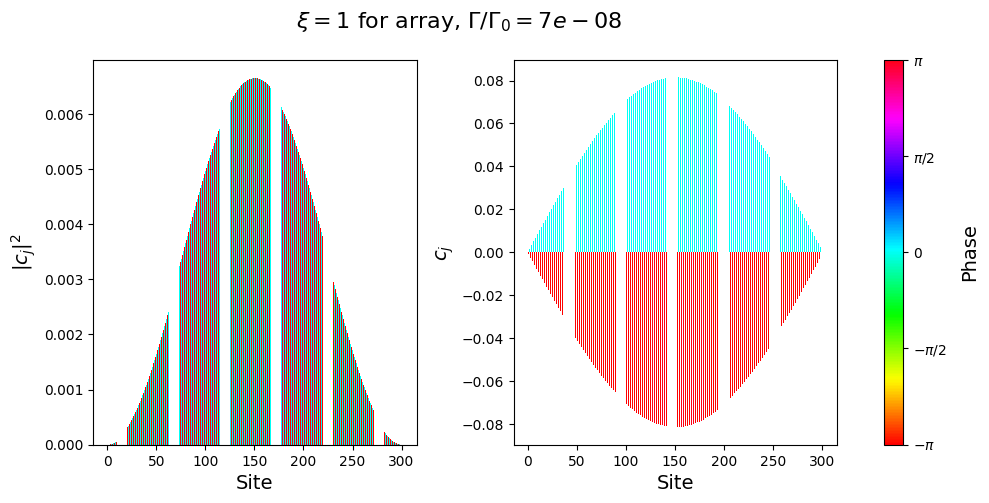

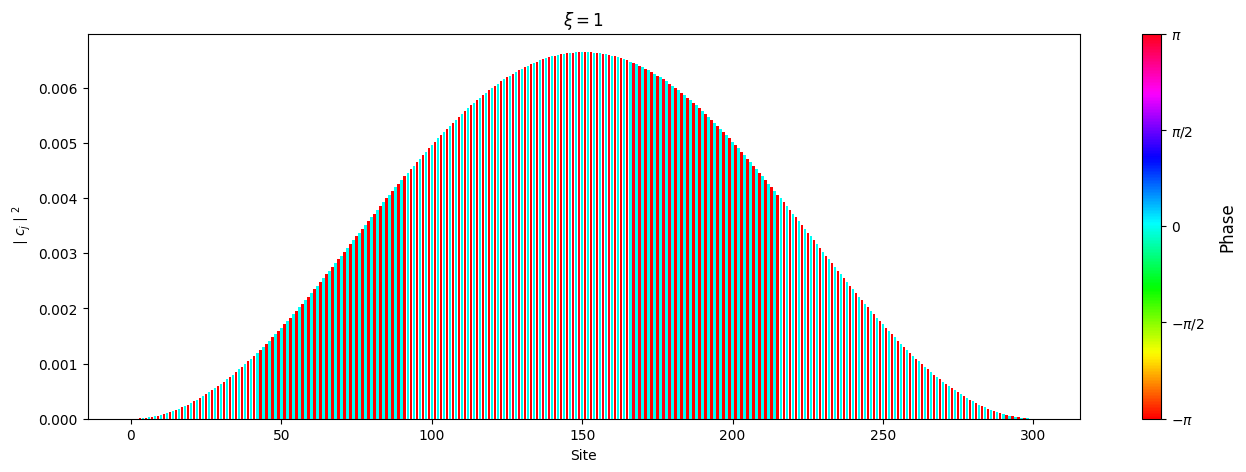

In [153]:
test = 300
points_50 = Qchains.ArrayGenerator(test)
dipole_vector_hat_50 = np.array([0, 1, 0]) #i y retning 
d_50 = 0.1
eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points_50, dipole_vector_hat_50, d_50)

Qchains.SiteProbAndAmplitudeDistribution(eig_val_50, eig_vec_50, state_num=0, titleprecision=8, sharey=False)
Qchains.SiteProbDistribution(eig_val_50, eig_vec_50, state_num=0, figsize=(16,5), hue=True)

In [154]:
subradiant_xpolarized = []
subradiant_ypolarized = []
subradiant_zpolarized = []

x_polarization = np.array([1, 0, 0])
y_polarization = np.array([0, 1, 0])
z_polarization = np.array([0, 0, 1])

d = 0.25
N_chain = np.linspace(10,200,39)
N_chain_int = N_chain.astype(int)
subradiant_decayrates_n = []



for n in N_chain_int:
    points_n = Qchains.ArrayGenerator(n)

    eig_vals_x, eig_vecs_x = Qchains.FindEigenstates(points_n, x_polarization, d)
    eig_vals_y, eig_vecs_y = Qchains.FindEigenstates(points_n, y_polarization, d)
    eig_vals_z, eig_vecs_z = Qchains.FindEigenstates(points_n, z_polarization, d)

    subradiant_xpolarized.append(- np.max(2*eig_vals_x.real)) 
    subradiant_ypolarized.append(- np.max(2*eig_vals_y.real)) 
    subradiant_zpolarized.append(- np.max(2*eig_vals_z.real)) 


# def PowerFit(x, A, k):
#     return A * x**(-k)
# par, cov = curve_fit(PowerFit, N_chain_int, subradiant_decayrates_n_reversed, p0 = [4, 4])
# print('A = ', par[0], 'k = ', par[1])
#plt.plot(N_chain_int, PowerFit(N_chain_int, *par), '-' ,label = r'Best fit $0.345x^{-3.08}$', c='orange')


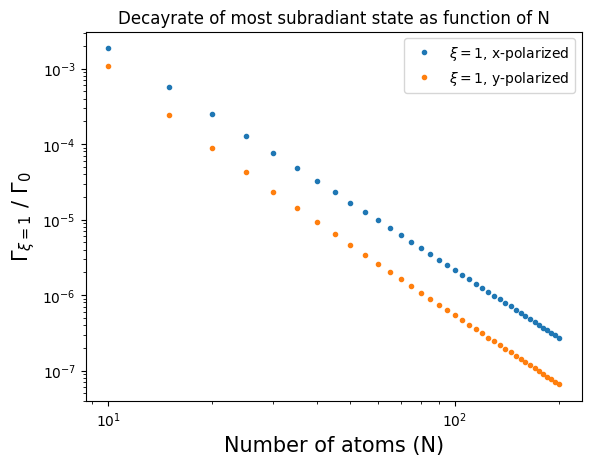

In [155]:
plt.plot(N_chain_int, subradiant_xpolarized, '.', label = r'$\xi = 1$, x-polarized')
plt.plot(N_chain_int, subradiant_ypolarized, '.', label = r'$\xi = 1$, y-polarized')
#plt.plot(N_chain_int, subradiant_zpolarized, '.', label = r'$\xi = 1$, z-polarized')


plt.xscale('log')
plt.yscale('log')
plt.title('Decayrate of most subradiant state as function of N')
plt.xlabel('Number of atoms (N)', size=15)
plt.ylabel(r'$\Gamma_{\xi=1} \ / \ \Gamma_0$', size = 15)
plt.legend();

In [156]:
N_chain

array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
        65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110., 115.,
       120., 125., 130., 135., 140., 145., 150., 155., 160., 165., 170.,
       175., 180., 185., 190., 195., 200.])